## CE9010: Introduction to Data Analysis
## Semester 2 2018/19
## Xavier Bresson
<hr>

## Tutorial 4: Supervised classification
## Objectives
### $\bullet$ Code the logistic regression model 
### $\bullet$ Compare with gradient descent and scikit-learn implementations
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades for each student $i$. <br>
The data label/target, $y_i$, indicates if the student was admitted (value is 1) or rejected (value is 0).

What is the number $n$ of training data?<br>
Hint: You may use numpy function `shape`.

In [2]:
# import data with numpy
data = np.loadtxt('data/admission_dataset.txt', delimiter=',')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

Number of training data= 100
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]]
(100, 3)
float64


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

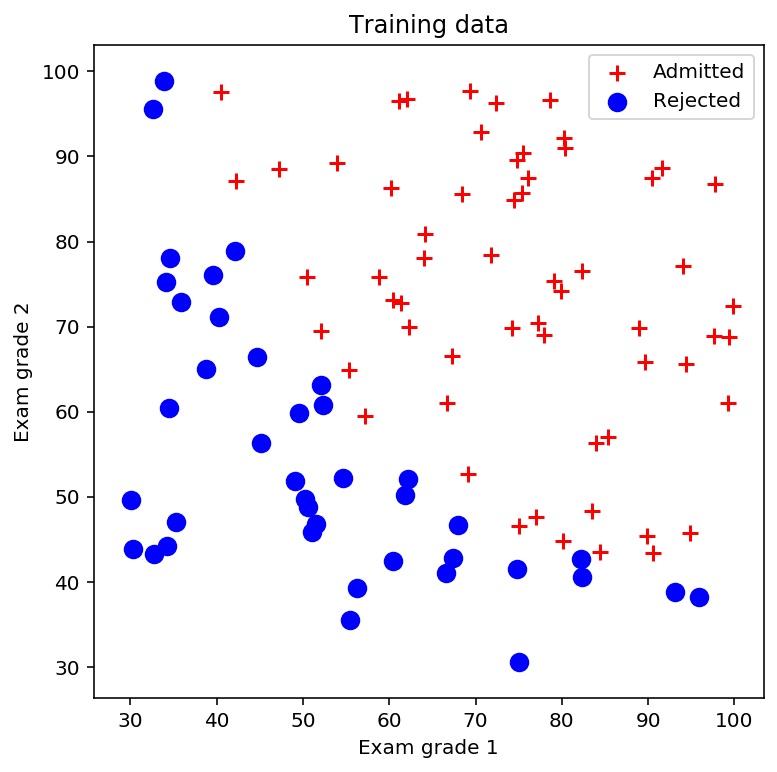

In [3]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.show()

## 3. Sigmoid/logistic function
<hr>
$$
\sigma(\eta) = \frac{1}{1+e^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:<br>
Hint: You may use functions `np.exp`, `np.linspace`.

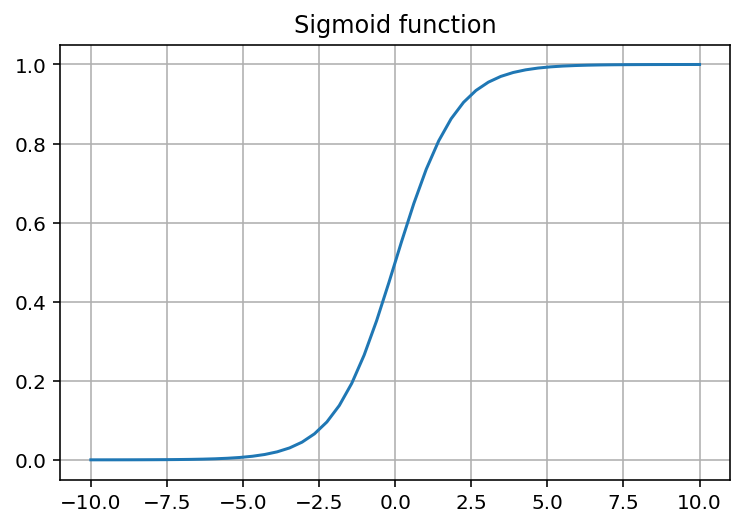

In [4]:
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) #YOUR CODE HERE
    return sigmoid_f 


# plot
x_values = np.linspace(-10,10)
plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the logistic regression/classification predictive function 
<hr>
$$
\begin{aligned}
p_w(x) &= \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)})\\
&= \sigma(X w)
\end{aligned}
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Implement the vectorized version of the logistic regression function. <br>

Check your code correctness: The first 3 values of $p_w(x)$ are [2.41e-10,1.44e-07,7.61e-10] for $w_0=-10, w_1=0.1, w_2=-0.2$. <br>

Hint: Respect the sizes of $X$ and $w$ when carrying out linear algebra multiplications. Use the new function `sigmoid`.


In [5]:
# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
print(X.shape)
print(X[:5,:])


# parameters vector
w = np.array([-10,0.1,-0.2])[:,None] # [:,None] adds a singleton dimension
print(w.shape)


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) #YOUR CODE HERE
    return p


# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred[:3])

(100, 3)
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
(3, 1)
[[2.41881640e-10]
 [1.44450554e-07]
 [7.61524532e-10]]


## 5. Define the logistic regression loss 
<hr>
$$
L(w)=-\frac{1}{n} \sum_{i=1}^n \ \Big(  y_i \log(p_w(x_i)) + (1-y_i)\log(1-p_w(x_i)) \Big)
$$

The vectorized representation is:
$$
L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big)
$$
with 
<br>
$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the logistic regression loss function. <br>

Check your code correctness: The loss values is $10.39$ for $w_0=-10, w_1=0.1, w_2=-0.2$. <br>

Hint: Respect the sizes of $X$, $w$ and $y$ when carrying out linear algebra multiplications. You may use numpy functions `.T`, `np.log`.


In [6]:
# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) #YOUR CODE HERE
    return loss


# Test loss function 
y = data[:,2][:,None] # label 
print(y.shape)
#print(y)
y_pred = f_pred(X,w) # prediction
loss = loss_logreg(y_pred,y)
print(loss)


(100, 1)
[[10.39164415]]


## 6. Define the gradient of the logistic regression loss 
<hr>

Given the loss
$$
L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{1}{n} X^T(p_w(x)-y)
$$


Implement the vectorized version of the gradient of the logistic regression loss function. <br>

Check your code correctness: The gradient value is $[-0.59,-44.83,-44.37]$ for $w_0=-10, w_1=0.1, w_2=-0.2$. <br>

Hint: Respect the sizes of $X$, $w$ and $y$ when carrying out linear algebra multiplications.


In [8]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 1/n* X.T.dot(y_pred-y) #YOUR CODE HERE
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)
print(grad)    

[[ -0.59998874]
 [-44.83036749]
 [-44.37339807]]


## 7. Implement the gradient descent algorithm 
<hr>

Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(p_w(x)-y)
$$

**7.1** Implement the vectorized version of the gradient descent function. <br>
Check your code correctness: The $w^{k}$ value after $1000$ iterations is [-10.004, 0.0854, 0.0792] for initial values $w_0=-10, w_1=0.1, w_2=-0.2$<br> and the loss value $L$ is 0.272.<br>


**7.2** Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations.<br>

**7.3** Try with initial values $w_0=0, w_1=0, w_2=0$. What is the value of $L$ after $1000$ iterations?<br>

Hint: You may use a table to store the values of $L(w^k)$ at each iteration.


Time= 0.03479409217834473
0.2728920756506523
[[-9.99988338]
 [ 0.08639915]
 [ 0.07828069]]


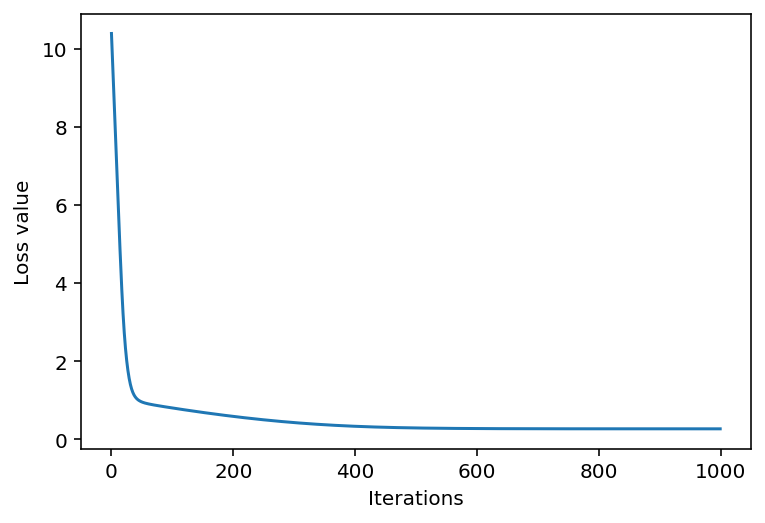

In [13]:
# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,3]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function  #YOUR CODE HERE
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss #YOUR CODE HERE
        w = w - tau* grad_f # update rule of gradient descent #YOUR CODE HERE
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w.squeeze() # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
#w_init = np.array([0,0,0])[:,None]
tau = 1e-4; max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>
It is defined by all points 
$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

Hint: You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.


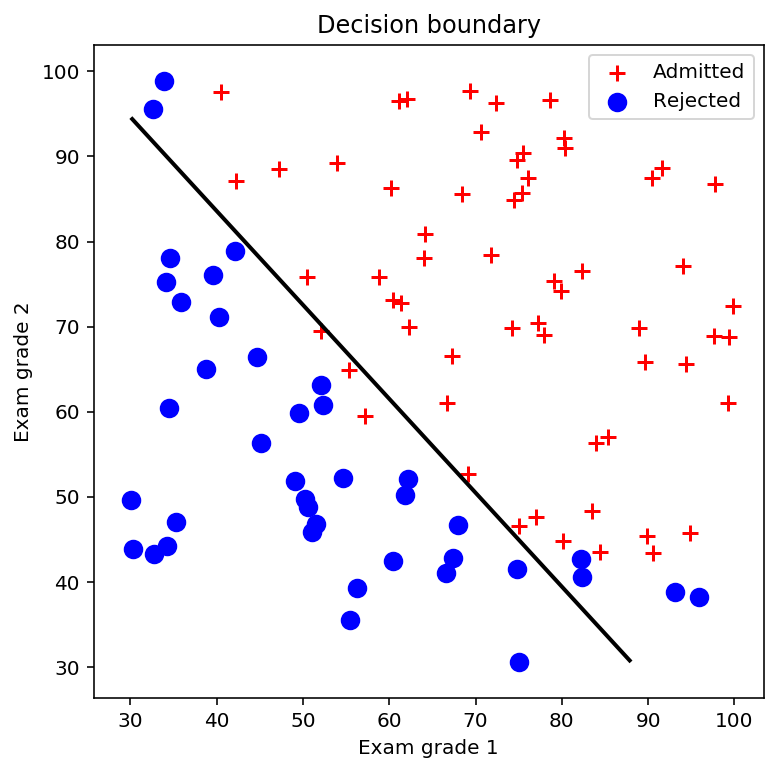

In [14]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') #YOUR CODE HERE
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.title('Decision boundary')
plt.show()


# record p values
p_gd = p

## 9. Comparison with Scikit-learn logistic regression algorithm
<hr>
What is the loss value of the Scikit-learn solution? <br>
Compare with the loss value given by gradient descent?<br>
What do we need to do to get a better loss (and solution) with gradient descent? 

Hint: You may use scikit-learn function `LogisticRegression(C=1e6)`.


Time= 0.01907515525817871
[[-25.16138556]
 [  0.20623222]
 [  0.2014719 ]]
loss sklearn= [[0.2034977]]
loss gradient descent= 0.2728920756506523


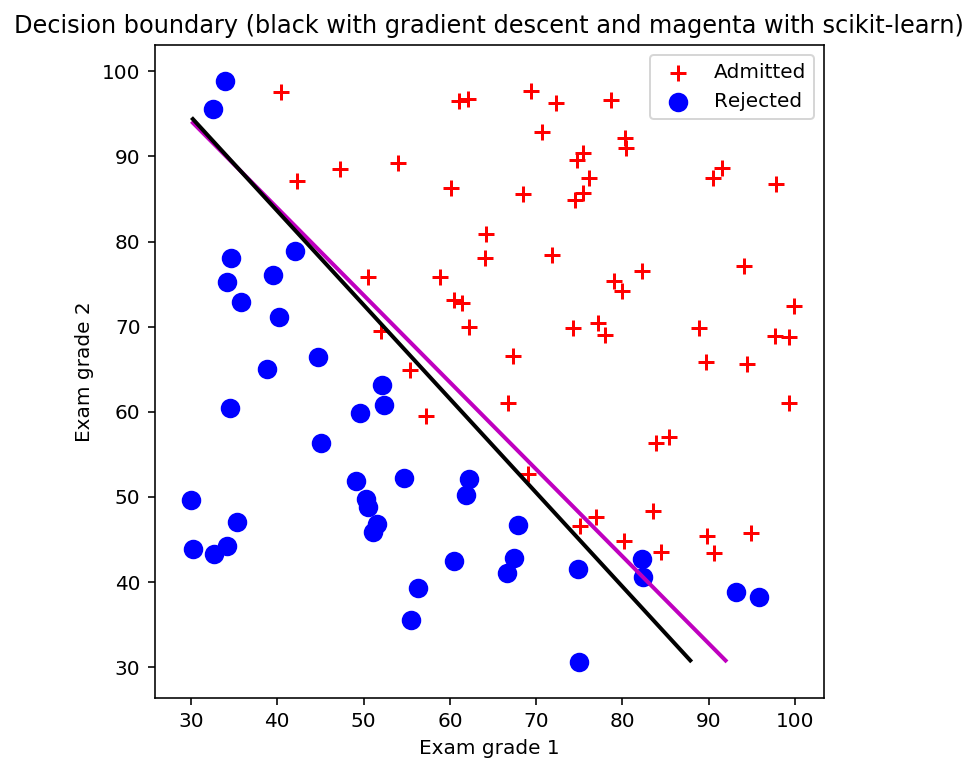

In [15]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(data[:,0:2], data[:,2]) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_
print(w_sklearn)
loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w_sklearn)
p = p.reshape(xx1.shape)
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='m');
plt.contour(xx1, xx2, p_gd, [0.5], linewidths=2, colors='k');

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend()
plt.show()


## 10. Probability for a student to be admitted with the grades (45,85)?
<hr>

In [16]:
# Predict probability of admission 
y_pred = f_pred(np.array([1,45,85]),w_sklearn)
print('Probability of admission is',y_pred[0]) #YOUR CODE HERE

Probability of admission is 0.7762901305092754
